# IMPORTING LIBRARIES AND GETTING DATASET

In [1]:
#importing some necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#loading the dataset selecting top data up to twenty thousand to allow for easy running
MBA=pd.read_csv("MARKET.csv").head(20000)

In [3]:
#calling the dataset
MBA 

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
19995,1721,15-10-2015,whole milk
19996,2877,10-04-2015,waffles
19997,3848,11-10-2015,frozen vegetables
19998,4344,01-03-2015,long life bakery product


# PREPARING THE DATASET

In [4]:
#check for empty cells
MBA.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [5]:
#check the datatype
MBA.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [6]:
#setting the date type to datetime
MBA['Date'] = pd.to_datetime(MBA['Date'],format='%d-%m-%Y')

In [7]:
#confirming datatype
MBA.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [8]:
#calling the dataset top five
MBA.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


# EXPLORING THE DATASET

In [9]:
#check for unique Item
MBA["itemDescription"].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [10]:
#check for number of times unique items appeared
MBA["itemDescription"].value_counts()

whole milk              1607
other vegetables        1186
sausage                  924
tropical fruit           898
rolls/buns               843
                        ... 
kitchen towels             2
whisky                     2
kitchen utensil            1
specialty vegetables       1
rubbing alcohol            1
Name: itemDescription, Length: 163, dtype: int64

In [11]:
#grouping by itemdescription to see the number of times a particular item was picked
MBA_GB_ITD= MBA.groupby("itemDescription").size().reset_index(name="Repeated")
MBA_GB_ITD

,itemDescription,Repeated
0,Instant food products,15
1,UHT-milk,167
2,abrasive cleaner,3
3,artif. sweetener,8
4,baby cosmetics,2
...,...,...
158,white bread,109
159,white wine,76
160,whole milk,1607
161,yogurt,596


In [12]:
#grouping by member number to see the number of times a particular member picked an item
MBA_GB_MN= MBA.groupby("Member_number").size().reset_index(name="Repeated")
MBA_GB_MN

,Member_number,Repeated
0,1000,8
1,1001,6
2,1002,4
3,1003,2
4,1004,7
...,...,...
3868,4996,6
3869,4997,3
3870,4998,2
3871,4999,9


In [13]:
#showing the top ten repeated items in descending order
MBA_GB_ITD_TEN= MBA_GB_ITD.sort_values("Repeated",ascending=False).head(10)
MBA_GB_ITD_TEN

,itemDescription,Repeated
160,whole milk,1607
101,other vegetables,1186
127,sausage,924
152,tropical fruit,898
119,rolls/buns,843
120,root vegetables,749
30,citrus fruit,736
135,soda,672
161,yogurt,596
56,frankfurter,580


#  ANALYSIS AND VISUALIZATIONS

In [14]:
#importing the matplotlib.pyplot for visualization
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'TOP TEN REPEATED ITEM')

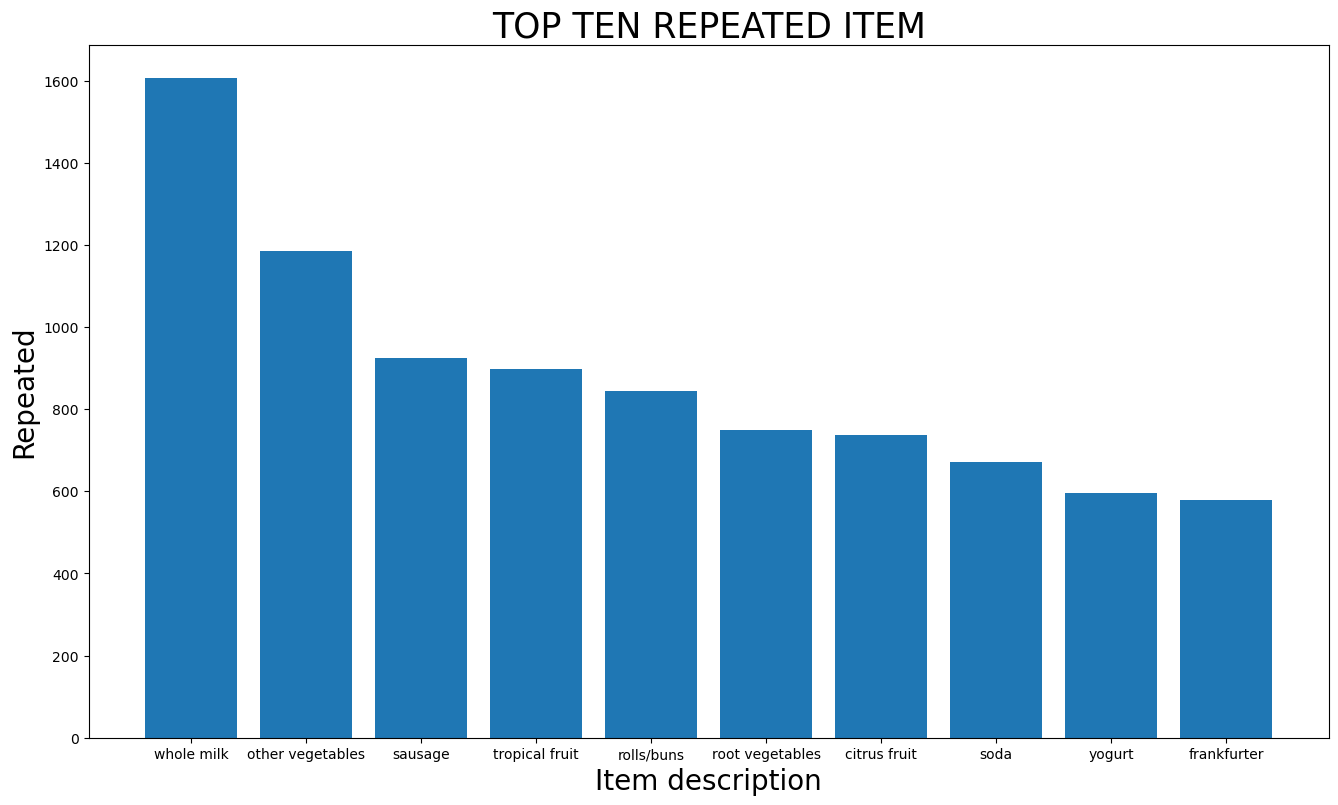

In [15]:
#visualizing the top ten items being repeated in the variable MBA_GB_ITD_TEN(descending order)
plt.figure(figsize=(16,9))
plt.bar(MBA_GB_ITD_TEN["itemDescription"],MBA_GB_ITD_TEN["Repeated"])
plt.xlabel("Item description", fontsize=20)
plt.ylabel("Repeated",fontsize=20)
plt.title("TOP TEN REPEATED ITEM", fontsize=25)

In [16]:
#setting the date in the dataframe as index
MBA_DATE= MBA.set_index(["Date"])
MBA_DATE

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-01-05,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-02-01,3037,whole milk
...,...,...
2015-10-15,1721,whole milk
2015-04-10,2877,waffles
2015-10-11,3848,frozen vegetables


In [17]:
#selecting the month and the total items picked in a month
TIME_GRAPH= MBA_DATE.resample("M")["itemDescription"].count()
TIME_GRAPH

Date
2014-01-31     579
2014-02-28     546
2014-03-31     538
2014-04-30     586
2014-05-31     616
2014-06-30     597
2014-07-31     597
2014-08-31     611
2014-09-30     576
2014-10-31     610
2014-11-30     568
2014-12-31     576
2015-01-31    1148
2015-02-28     993
2015-03-31    1086
2015-04-30    1069
2015-05-31    1152
2015-06-30    1065
2015-07-31    1115
2015-08-31    1204
2015-09-30    1023
2015-10-31    1059
2015-11-30    1126
2015-12-31     960
Freq: M, Name: itemDescription, dtype: int64

In [18]:
#Renaming the column head for number of items tp Total Items
MBA_MONTHLY_ITEMS=TIME_GRAPH.reset_index(name="Total_items")
MBA_MONTHLY_ITEMS

,Date,Total_items
0,2014-01-31,579
1,2014-02-28,546
2,2014-03-31,538
3,2014-04-30,586
4,2014-05-31,616
5,2014-06-30,597
6,2014-07-31,597
7,2014-08-31,611
8,2014-09-30,576
9,2014-10-31,610


Text(0, 0.5, 'Number of Item')

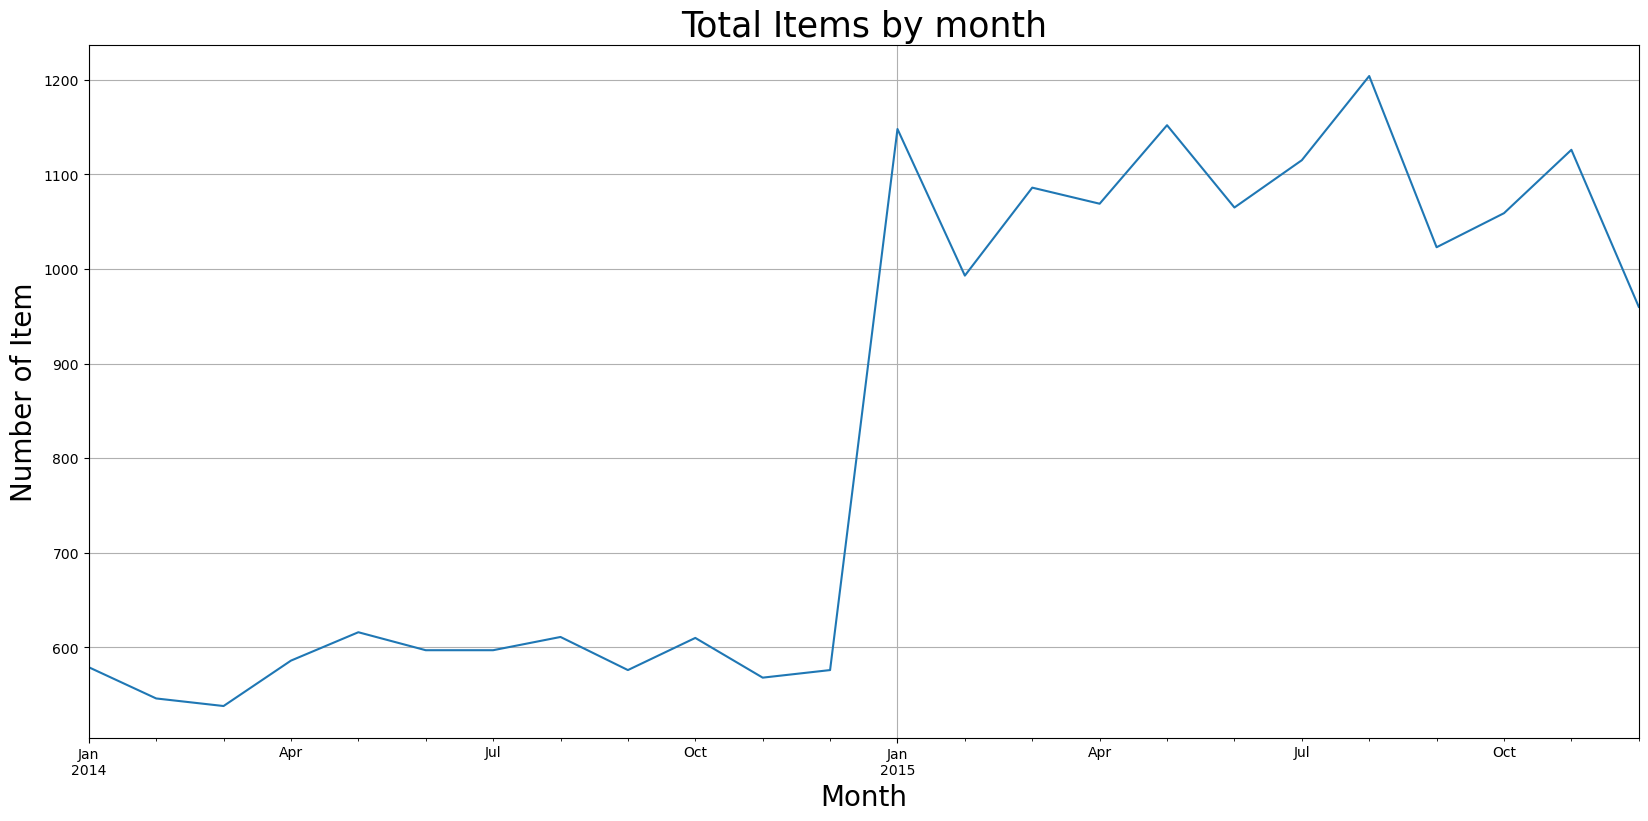

In [19]:
#plotting the time graph against Total Items
TIME_GRAPH.plot(figsize=(20,9),grid=True,)
plt.title("Total Items by month", fontsize=25)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Number of Item",fontsize=20)

# MARKET BASKET ANALYSIS

In [20]:
#calling out the datasets required for market basket analysis
MBA_REQUIRED= MBA[["Member_number","itemDescription"]]
MBA_REQUIRED

,Member_number,itemDescription
0,1808,tropical fruit
1,2552,whole milk
2,2300,pip fruit
3,1187,other vegetables
4,3037,whole milk
...,...,...
19995,1721,whole milk
19996,2877,waffles
19997,3848,frozen vegetables
19998,4344,long life bakery product


In [21]:
#rearranging the dataframe in descending order
CUSTOMER_PATTERN= MBA_REQUIRED.sort_values("Member_number",ascending=False)
CUSTOMER_PATTERN["itemDescription"]= CUSTOMER_PATTERN["itemDescription"].str.strip()
CUSTOMER_PATTERN

,Member_number,itemDescription
9340,5000,bottled beer
3578,5000,soda
19727,5000,root vegetables
11728,5000,fruit/vegetable juice
14840,4999,semi-finished bread
...,...,...
4843,1000,sausage
1629,1000,soda
13331,1000,whole milk
18196,1000,misc. beverages


# USING THE APRIORI ASSCOCIATION MINING RULE

In [22]:
#importing the library; module was previously installed
from apyori import apriori

In [23]:
#Grouping the data and coverting them to list
transactions = CUSTOMER_PATTERN.groupby('Member_number')['itemDescription'].apply(list).tolist()

In [24]:
#using the apriori rule
rules = apriori(transactions, min_support=0.002, min_confidence=0.05,min_lift=3, min_length=2)

In [25]:
#converting the result from the rulles to list
results=list(rules)

In [26]:
#showing the results
results

[RelationRecord(items=frozenset({'beverages', 'oil'}), support=0.0020655822359927703, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beverages'}), items_add=frozenset({'oil'}), confidence=0.05673758865248226, lift=3.1392097264437684), OrderedStatistic(items_base=frozenset({'oil'}), items_add=frozenset({'beverages'}), confidence=0.11428571428571427, lift=3.1392097264437684)]),
 RelationRecord(items=frozenset({'specialty bar', 'cream cheese'}), support=0.002581977794990963, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cream cheese'}), items_add=frozenset({'specialty bar'}), confidence=0.08196721311475408, lift=3.566955240375759), OrderedStatistic(items_base=frozenset({'specialty bar'}), items_add=frozenset({'cream cheese'}), confidence=0.11235955056179774, lift=3.566955240375759)]),
 RelationRecord(items=frozenset({'frozen vegetables', 'napkins'}), support=0.0020655822359927703, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frozen vegetables'}), 

In [27]:
#code to inspect the rules and arrange the resuls to dataframe
def inspect(results):
    lhs=[tuple(result[2][0][0])[0]for result in results]
    rhs=[tuple(result[2][0][1])[0]for result in results]
    supports=[result[1]for result in results]
    confidence=[result[2][0][2] for result in results]
    lifts=[result[2][0][3] for result in results]
    return list(zip(lhs,rhs,supports,confidence,lifts))
results_to_DF=pd.DataFrame(inspect(results),columns=["left hand side","right hand side", "supports", "confidence","lifts"])

In [28]:
#showing the ten largest 
results_to_DF.nlargest(n=10,columns="lifts")

,left hand side,right hand side,supports,confidence,lifts
38,beef,frankfurter,0.002066,0.177778,6.434891
100,other vegetables,tropical fruit,0.002066,0.096386,5.925416
24,liquor,citrus fruit,0.002066,0.148148,5.915235
46,other vegetables,whipped/sour cream,0.002324,0.075000,5.187054
79,hamburger meat,whole milk,0.002324,0.409091,5.144185
21,waffles,other vegetables,0.002324,0.120000,4.944255
55,canned beer,chicken,0.002066,0.173913,4.710246
99,citrus fruit,yogurt,0.002066,0.069565,4.345582
67,citrus fruit,frankfurter,0.002324,0.120000,4.343551
22,chocolate,whipped/sour cream,0.002324,0.087379,4.338686
